# What is Groupby in Pandas?

Hi Guys, Welcome to [Be.Analyst](https://youtube.com/@Be.Analyst) 😀
</br>
In this notebook, I'm going to show the groupby method in Pandas.
</br>
Happy Learning 🐱‍🏍 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,0.930811,0.641177
1,a,two,1.132731,0.050379
2,b,three,1.729141,-1.569949
3,b,one,-0.494541,-0.476267
4,a,two,-0.695931,0.297128
5,b,three,-0.717334,-0.512003


In [3]:
group=df["data1"].groupby(df["key1"])

In [4]:
group

In [5]:
group.mean()

key1
a    0.455871
b    0.172422
Name: data1, dtype: float64

In [6]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one      0.930811
      two      0.218400
b     one     -0.494541
      three    0.505903
Name: data1, dtype: float64

In [7]:
ave.unstack()

key2,one,three,two
key1,,,
a,0.930811,NaN,0.2184
b,-0.494541,0.505903,NaN


In [8]:
df.groupby("key1").mean()

C:\Users\durge\AppData\Local\Temp\ipykernel_7436\142431825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("key1").mean()


,data1,data2
key1,,
a,0.455871,0.329561
b,0.172422,-0.852740


In [9]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one    0.930811  0.641177
     two    0.218400  0.173754
b    one   -0.494541 -0.476267
     three  0.505903 -1.040976

## Iterating over Groups

In [10]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.930811  0.641177
1    a  two  1.132731  0.050379
4    a  two -0.695931  0.297128
b
  key1   key2     data1     data2
2    b  three  1.729141 -1.569949
3    b    one -0.494541 -0.476267
5    b  three -0.717334 -0.512003


In [11]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  0.930811  0.641177
a two
  key1 key2     data1     data2
1    a  two  1.132731  0.050379
4    a  two -0.695931  0.297128
b one
  key1 key2     data1     data2
3    b  one -0.494541 -0.476267
b three
  key1   key2     data1     data2
2    b  three  1.729141 -1.569949
5    b  three -0.717334 -0.512003


In [12]:
piece=dict(list(df.groupby("key1")))

In [13]:
piece["a"]

,key1,key2,data1,data2
0,a,one,0.930811,0.641177
1,a,two,1.132731,0.050379
4,a,two,-0.695931,0.297128


## Selecting a Column or Subset of Columns

In [14]:
df.groupby(['key1', 
            'key2'])[['data1']].mean()

data1
key1 key2           
a    one    0.930811
     two    0.218400
b    one   -0.494541
     three  0.505903

## Grouping with Dicts and Series

In [15]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,1.874390,-0.680490,1.660011,-1.048273
cherry,-0.884995,-0.436490,-0.509212,1.216491
banana,-0.365506,0.458673,-0.106416,-0.108145
kiwi,1.477259,-1.394886,1.547740,-0.263903


In [16]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [17]:
group=fruit.groupby(label,axis=1)

In [18]:
group.sum()

,green,yellow
apple,3.534401,-1.728764
cherry,-1.394207,0.780001
banana,-0.471922,0.350528
kiwi,3.024999,-1.658789


In [19]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [20]:
fruit.groupby(s,axis=1).count()

,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


## Grouping with Functions

In [21]:
fruit.groupby(len).sum()

,a,b,c,d
4,1.477259,-1.394886,1.547740,-0.263903
5,1.874390,-0.680490,1.660011,-1.048273
6,-1.250501,0.022183,-0.615628,1.108346


## Grouping by Index Levels

In [22]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [23]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -0.505094  2.986376 -0.558572  0.143144 -0.332934
1       1.130950 -0.408566  1.130212  0.475620  0.559419
2       0.266209  0.369783  1.209290 -0.316395 -0.602330
3      -0.296635 -1.283870 -0.567701 -0.708508  1.232162

In [24]:
data.groupby(level="letter",axis=1).sum()

letter,A,B
0,1.922710,-0.189790
1,1.852596,1.035038
2,1.845282,-0.918725
3,-2.148206,0.523654


## Application with Real Data Set 

In [26]:
game=pd.read_csv("DataSets/vgsalesGlobale.csv")

In [27]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [29]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
game.Global_Sales.mean()

0.5374406555006628

In [31]:
group=game.groupby("Genre")

In [32]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [33]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [34]:
game[game.Genre=="Action"].Global_Sales.mean()

0.5281001206272617

In [35]:
group.mean()

C:\Users\durge\AppData\Local\Temp\ipykernel_7436\3928442431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [36]:
%matplotlib inline

<Axes: xlabel='Genre'>

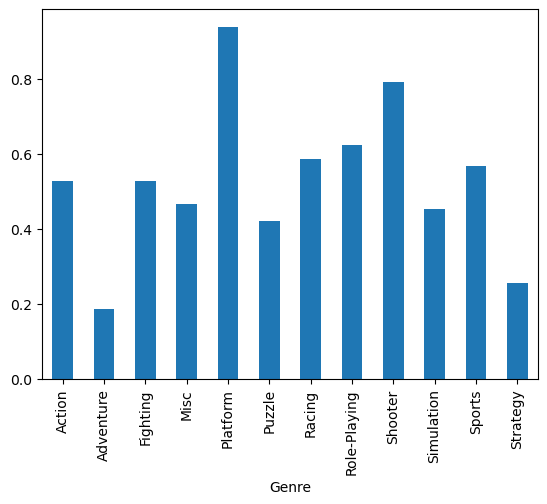

In [37]:
group["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

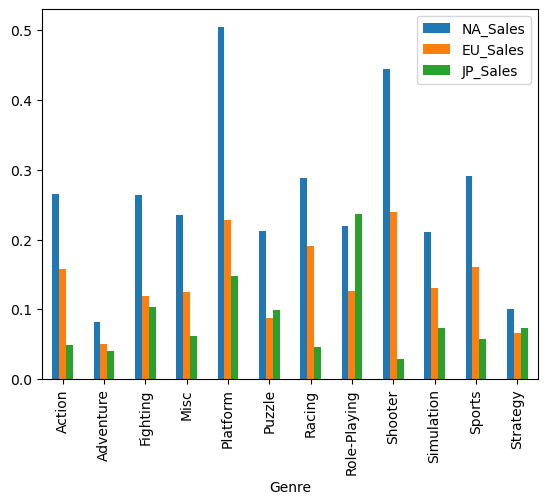

In [38]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")

Don't forget to follow us on [YouTube](http://youtube.com/@Be.Analyst) | [Medium](https://medium.com/@durgeshanalyst) | [Twitter](https://twitter.com/DurgeshBR?t=2LDCN4pHkZOYIo3rMXvKnw&s=09) | [GitHub](http://github.com/durgeshanalyst) | [Linkedin](https://www.linkedin.com/in/durgeshanalyst/) | [Kaggle](https://www.kaggle.com/durgeshanalyst) 😎